# Project Name: Supply Chain Analysis
Project Type: Exploratory Data Analysis (EDA)
Contribution: Individual

Project Summary:
This project analyzes a comprehensive dataset on supply chain operations, covering product demand, vendor performance, shipment methods, delivery delays, and financial metrics. The dataset includes over 10,000 orders and 33 variables, providing a detailed foundation for identifying trends and improving overall supply chain efficiency. The objective is to uncover insights that can enhance logistics, strengthen vendor relationships, and boost revenue.

The analysis highlights Nigeria as the country with the highest product demand, positioning it as a key market for strategic growth. SCMS from RDC emerges as the leading vendor, contributing the most to total revenue. Building stronger partnerships with such high-performing vendors could significantly enhance supply chain performance and financial outcomes.

Air shipment is identified as the most commonly used mode of transport, reflecting its efficiency in reducing transit times. However, the higher costs associated with air transport suggest the need for better cost-control strategies. Delivery delays vary across different regions, pointing to logistical challenges that need to be addressed to enhance customer satisfaction and operational efficiency.

The ARV product group shows the highest line item value, underscoring its significant contribution to overall revenue. Understanding the factors behind its success could help replicate similar strategies for other product categories. Correlation analysis using pair plots reveals meaningful relationships, such as the effect of product weight on costs and the impact of delivery delays on revenue, offering actionable insights for better decision-making.

Visualizations such as bar charts, pie charts, stacked bar charts, and line graphs provide a clear understanding of the data. For example, bar charts illustrate the top revenue-generating vendors, pie charts show the distribution of vendor contributions, and stacked bar charts reveal shipment modes by country.

In conclusion, this analysis uncovers key trends in supply chain operations, providing strategic recommendations to optimize processes, improve vendor relationships, and enhance logistics, ultimately driving business growth and customer satisfaction.

Problem Statement:
The objective of this project is to analyze and enhance supply chain operations by identifying key patterns in product demand, vendor performance, shipment efficiency, delivery delays, and product profitability. The goal is to streamline logistics, strengthen vendor partnerships, and increase overall revenue while reducing delivery delays and operational inefficiencies.

1. Know Your Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('SCMS_Delivery_History_Dataset.csv')

In [3]:
df.head()
     

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [4]:

# Dataset Rows & Columns count
df.shape

(10324, 33)

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

In [7]:
# Missing Values/Null Values Count
print(df.isnull().sum())

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

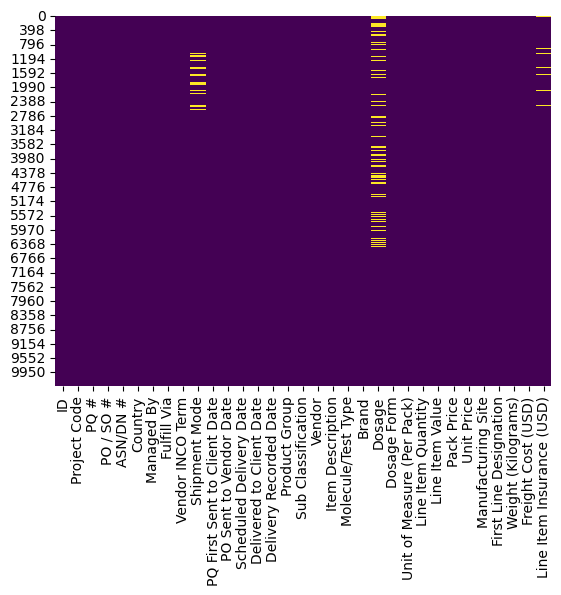

In [8]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()

Understanding Your Variables

In [9]:
# Dataset Columns
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe()
     

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


Check Unique Values for each variable

In [11]:
# Check Unique Values for each variable.
for column in df.columns:
  print(f"{column} unique values: {df[column].nunique()}")
     

ID unique values: 10324
Project Code unique values: 142
PQ # unique values: 1237
PO / SO # unique values: 6233
ASN/DN # unique values: 7030
Country unique values: 43
Managed By unique values: 4
Fulfill Via unique values: 2
Vendor INCO Term unique values: 8
Shipment Mode unique values: 4
PQ First Sent to Client Date unique values: 765
PO Sent to Vendor Date unique values: 897
Scheduled Delivery Date unique values: 2006
Delivered to Client Date unique values: 2093
Delivery Recorded Date unique values: 2042
Product Group unique values: 5
Sub Classification unique values: 6
Vendor unique values: 73
Item Description unique values: 184
Molecule/Test Type unique values: 86
Brand unique values: 48
Dosage unique values: 54
Dosage Form unique values: 17
Unit of Measure (Per Pack) unique values: 31
Line Item Quantity unique values: 5065
Line Item Value unique values: 8741
Pack Price unique values: 1175
Unit Price unique values: 183
Manufacturing Site unique values: 88
First Line Designation uniqu

Data Wrangling

In [12]:

df.shape

(10324, 33)

In [13]:
# Write your code to make your dataset analysis ready
df.dropna(inplace=True)
df.fillna(0, inplace=True)
     

In [14]:
df.shape

(8158, 33)

In [15]:
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

Data Visualization, Storytelling & Experimenting with Charts:
To explore the relationships between different variables, various charts and visualizations were created to uncover meaningful patterns and insights.

Chart - 1:
A bar chart was used to display the top vendors by total revenue. This visualization helps identify the highest-performing vendors, providing insights into which vendor relationships should be prioritized to maximize business growth and operational efficiency.

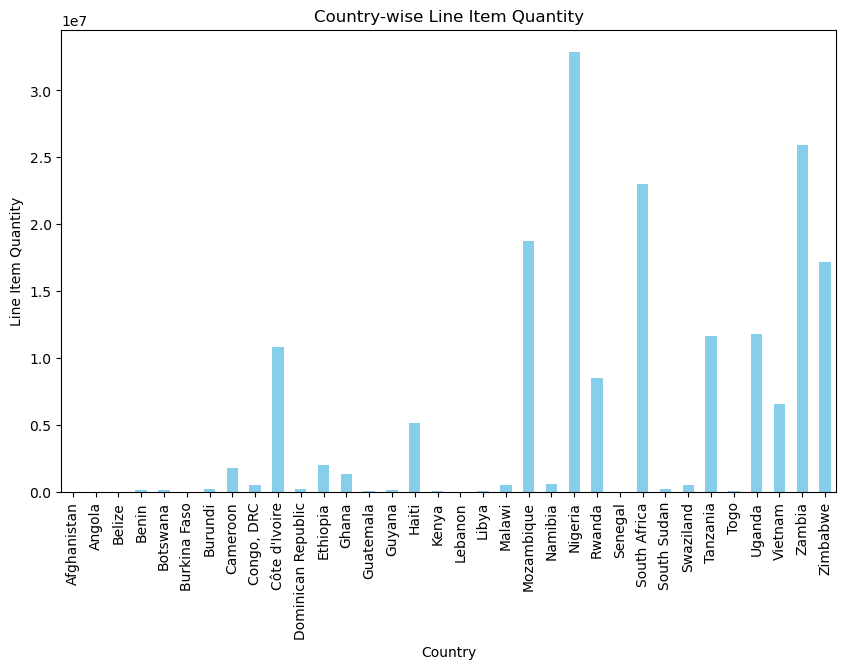

In [16]:
# Chart - 1 visualization code

country_quantity = df.groupby('Country')['Line Item Quantity'].sum()
country_quantity.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Country-wise Line Item Quantity')
plt.ylabel('Line Item Quantity')
plt.xlabel('Country')
plt.show()
     

1. Why did you pick the specific chart?
Answer: Bar charts are effective for comparing vendor performance and total revenue, making it easy to identify the highest and lowest contributors.

2. What is/are the insight(s) found from the chart?
Answer: Reveals the top-performing vendors and their contribution to total revenue. SCMS from RDC stands out as the leading vendor.

3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
Answer: Strengthening relationships with top-performing vendors can boost revenue and improve supply chain efficiency. However, over-reliance on a single vendor may pose risks if performance declines.

Chart - 2

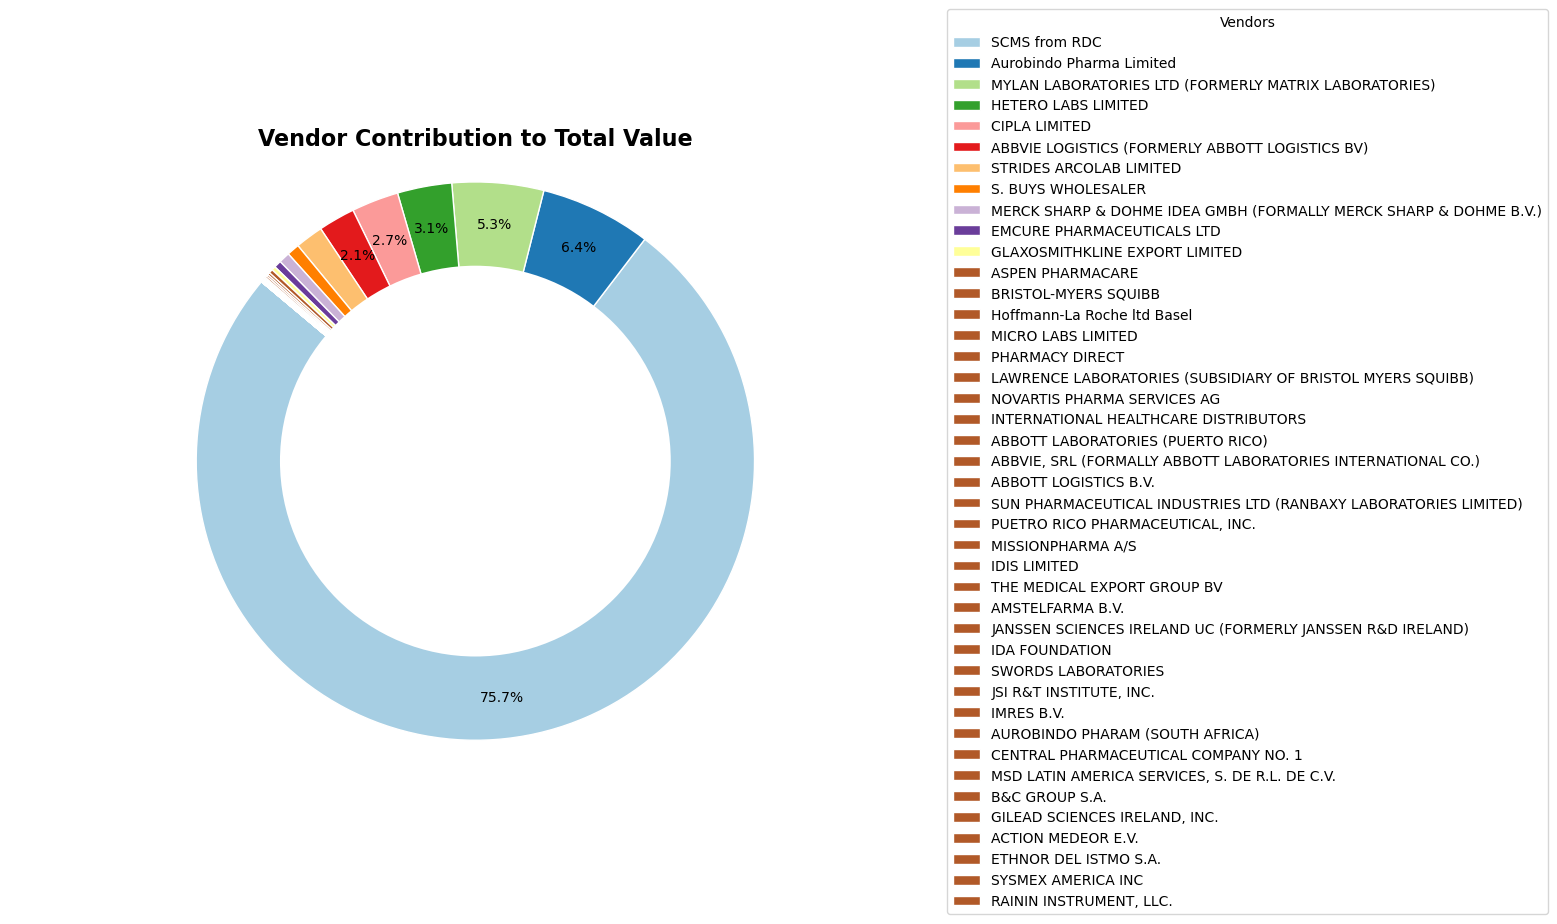

In [20]:
import matplotlib.pyplot as plt

# Grouping and sorting vendor contribution
vendor_value = df.groupby('Vendor')['Line Item Value'].sum().sort_values(ascending=False)

# Define a professional color palette
colors = plt.cm.Paired(range(len(vendor_value)))

# Increase figure size
plt.figure(figsize=(12, 8))

# Plot pie chart
wedges, texts, autotexts = plt.pie(
    vendor_value, 
    labels=None,  # Remove labels from chart to reduce clutter
    autopct=lambda p: f'{p:.1f}%' if p > 2 else '',  # Show only meaningful percentages
    colors=colors, 
    startangle=140,
    wedgeprops={'edgecolor': 'white'},
    pctdistance=0.85
)

# Add a legend to the side instead of showing long labels on the chart
plt.legend(
    wedges, vendor_value.index, 
    title="Vendors", 
    loc="center left", 
    bbox_to_anchor=(1, 0.5), 
    fontsize=10
)

# Create a donut chart by adding a circle at the center
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Set title and formatting
plt.title('Vendor Contribution to Total Value', fontsize=16, weight='bold')
plt.axis('equal')

# Display the chart
plt.show()


1. Why did you pick the specific chart?
Answer: Pie charts effectively show proportional contributions, making it easy to visualize the share of each vendor in the total value.

2. What is/are the insight(s) found from the chart?
Answer: Reveals top vendors driving business value, highlighting which vendors contribute the most to overall revenue.

3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
Answer: Helps prioritize partnerships with high-contribution vendors, enabling better resource allocation and improving vendor relationships.

Chart - 3

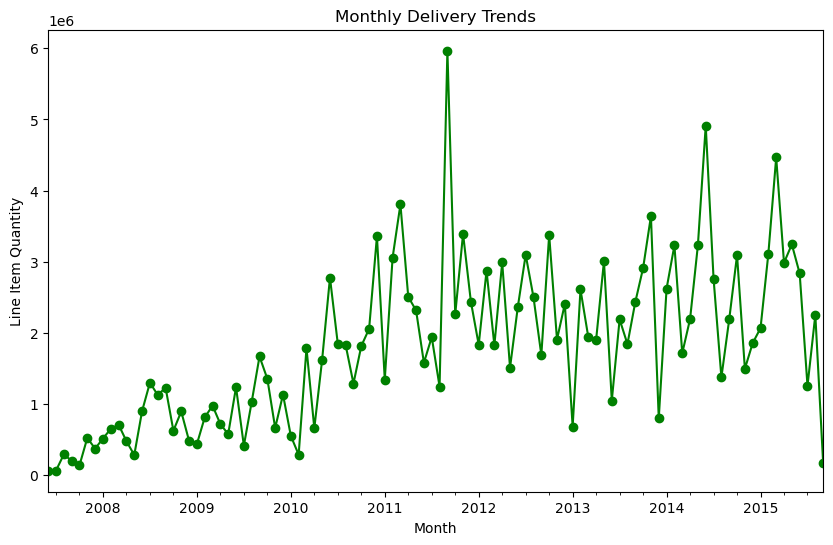

In [22]:
# Chart - 3 visualization code
df['Delivered to Client Date'] = pd.to_datetime(df['Delivered to Client Date'])
monthly_trend = df.groupby(df['Delivered to Client Date'].dt.to_period('M'))['Line Item Quantity'].sum()
monthly_trend.plot(kind='line', marker='o', figsize=(10, 6), color='green')
plt.title('Monthly Delivery Trends')
plt.ylabel('Line Item Quantity')
plt.xlabel('Month')
plt.show()

1. Why did you pick the specific chart?
Answer: Line charts are best for visualizing trends over time, making it easy to identify patterns and fluctuations.

2. What is/are the insight(s) found from the chart?
Answer: Identifies peak and off-peak delivery periods, helping to understand seasonal or cyclical variations.

3. Will the gained insights help create a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
Answer: Supports inventory planning and resource allocation by aligning resources with demand patterns, improving efficiency and reducing costs.

Chart - 4

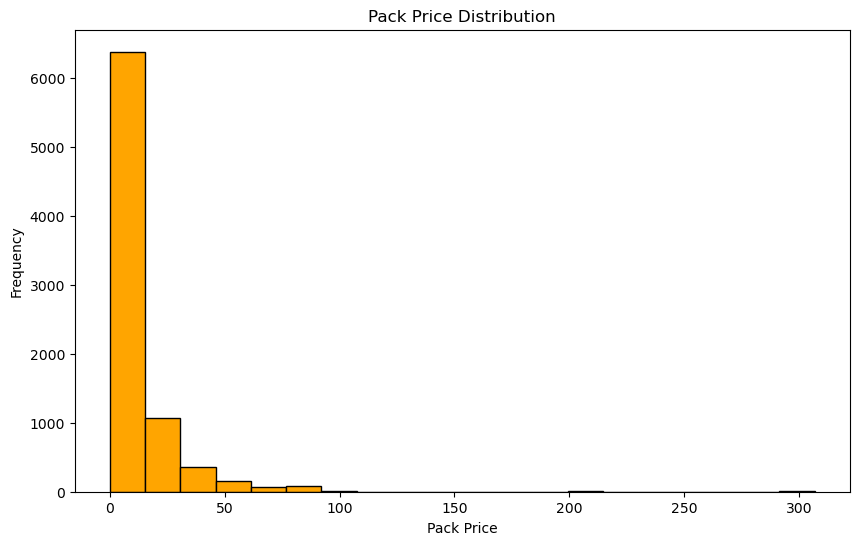

In [23]:
# Chart - 4 visualization code
df['Pack Price'].plot(kind='hist', bins=20, color='orange', edgecolor='black', figsize=(10, 6))
plt.title('Pack Price Distribution')
plt.xlabel('Pack Price')
plt.ylabel('Frequency')
plt.show()

1. Why did you pick the specific chart?
Answer: Histograms effectively show the distribution of pack prices, making it easy to identify common pricing clusters and outliers.

2. What is/are the insight(s) found from the chart?
Answer: Most pack prices are concentrated in the lower range, with very few high-value packs. This suggests that low-cost packs dominate the market.

3. Will the gained insights help create a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
Answer: Yes, understanding the price distribution helps in setting competitive pricing strategies and identifying opportunities for premium pricing. However, heavy reliance on low-cost packs could limit profit margins.

Chart - 5

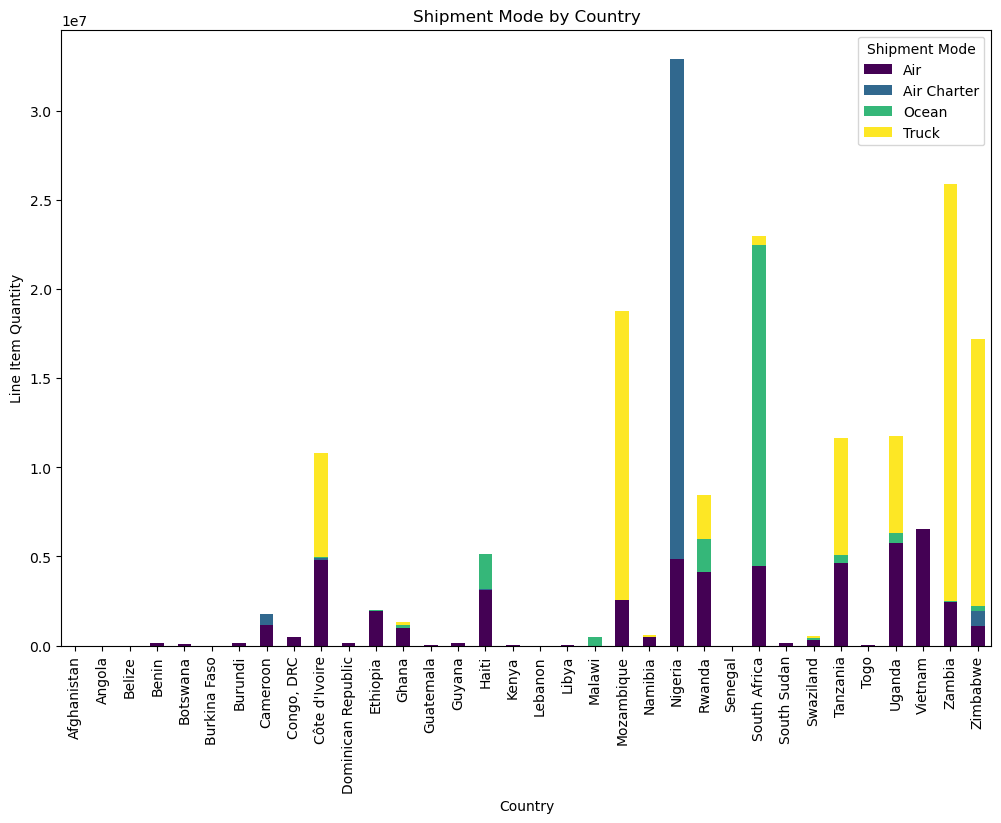

In [24]:
# Chart - 5 visualization code
shipment_mode_country = df.groupby(['Country', 'Shipment Mode'])['Line Item Quantity'].sum().unstack()
shipment_mode_country.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Shipment Mode by Country')
plt.ylabel('Line Item Quantity')
plt.xlabel('Country')
plt.show()

1.Why did you pick the specific chart?
Answer: Stacked bar charts effectively compare shipment modes across multiple countries, showing both individual and total contributions.

2. What is/are the insight(s) found from the chart?
Answer: The chart reveals that certain countries rely more heavily on specific shipment modes, such as air or truck, indicating varying logistical preferences.

3. Will the gained insights help create a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
Answer: Yes, understanding shipment mode preferences helps in optimizing logistics strategies and reducing costs. However, heavy dependence on expensive modes like air freight may increase operational costs.

Chart - 6

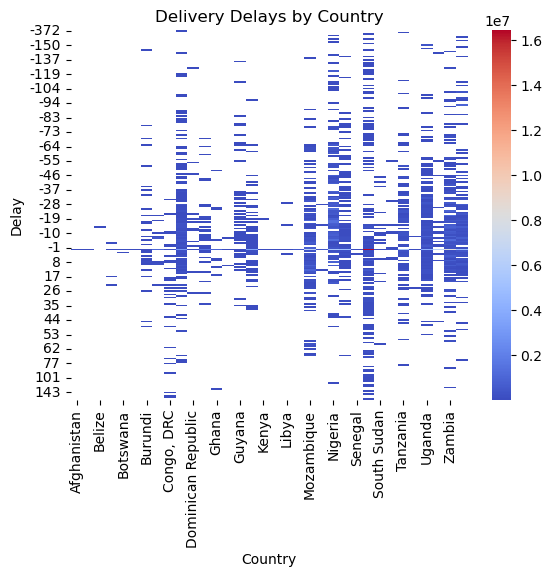

In [25]:
# Chart - 6 visualization code
df['Delay'] = (pd.to_datetime(df['Delivered to Client Date']) - pd.to_datetime(df['Scheduled Delivery Date'])).dt.days
sns.heatmap(df.pivot_table(values='Line Item Quantity', index='Delay', columns='Country', aggfunc='sum'), cmap='coolwarm')
plt.title('Delivery Delays by Country')
plt.show()

1. Why did you pick the specific chart?
Answer: Heatmaps effectively visualize the intensity and distribution of delivery delays across different countries, making it easy to identify patterns and anomalies.

2. What is/are the insight(s) found from the chart?
Answer: The chart reveals consistent delays in certain countries, indicating logistical challenges and potential bottlenecks in the supply chain.

3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
Answer: Yes, identifying delay patterns allows for targeted improvements in logistics, helping reduce delivery time and enhance customer satisfaction. However, unresolved bottlenecks could increase operational costs and affect business efficiency.

Chart - 7

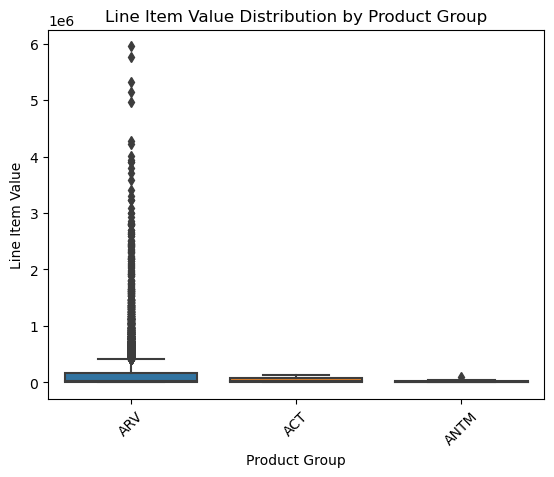

In [27]:
# Chart - 7 visualization code
sns.boxplot(x='Product Group', y='Line Item Value', data=df)
plt.title('Line Item Value Distribution by Product Group')
plt.xticks(rotation=45)
plt.show()


1. Why did you pick the specific chart?
Answer: Box plots are useful for showing the distribution, variability, and presence of outliers within different product groups, providing a clear view of data spread and anomalies.

2. What is/are the insight(s) found from the chart?
Answer: The chart shows that the ARV product group has a higher value range and significant outliers compared to ACT and ANTM, indicating that ARV products are high-value but also have greater variability.

3. Will the gained insights help create a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
Answer: Yes, focusing on ARV products could enhance profitability due to their high value. However, the presence of high variability and outliers suggests potential risks or inefficiencies that should be investigated further to maintain consistent performance.

Chart - 8

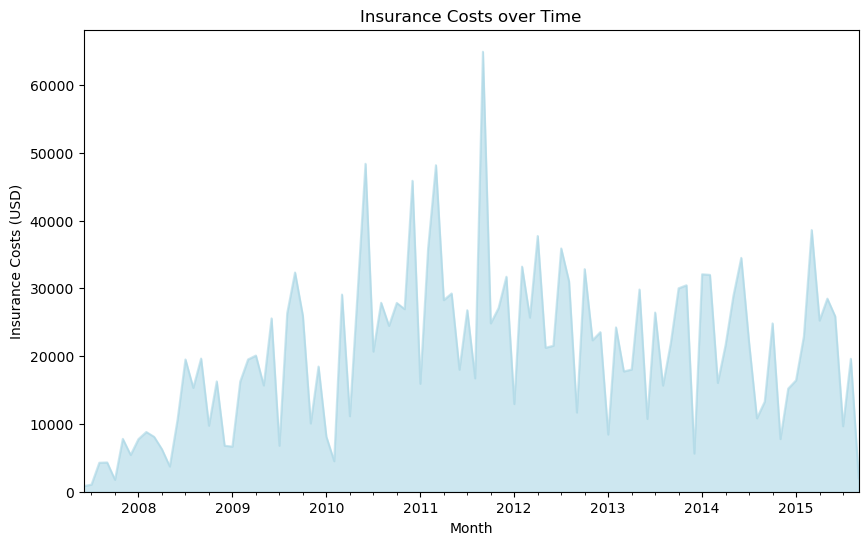

In [29]:
# Chart - 8 visualization code
insurance_trend = df.groupby(df['Delivered to Client Date'].dt.to_period('M'))['Line Item Insurance (USD)'].sum()
insurance_trend.plot(kind='area', color='lightblue', alpha=0.6, figsize=(10, 6))
plt.title('Insurance Costs over Time')
plt.ylabel('Insurance Costs (USD)')
plt.xlabel('Month')
plt.show()

1. Why did you pick the specific chart?
Answer: Area charts are effective for showing trends over time and highlighting the magnitude of cumulative changes.

2. What is/are the insight(s) found from the chart?
Answer: The chart shows that insurance costs have fluctuated significantly over time, with a noticeable peak around 2012 and relatively high volatility afterward.

3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
Answer: Yes, identifying patterns in insurance costs can help improve budgeting and risk management. The sharp peak in 2012 suggests an anomaly or unexpected event that should be analyzed further to prevent future spikes.

Chart - 9

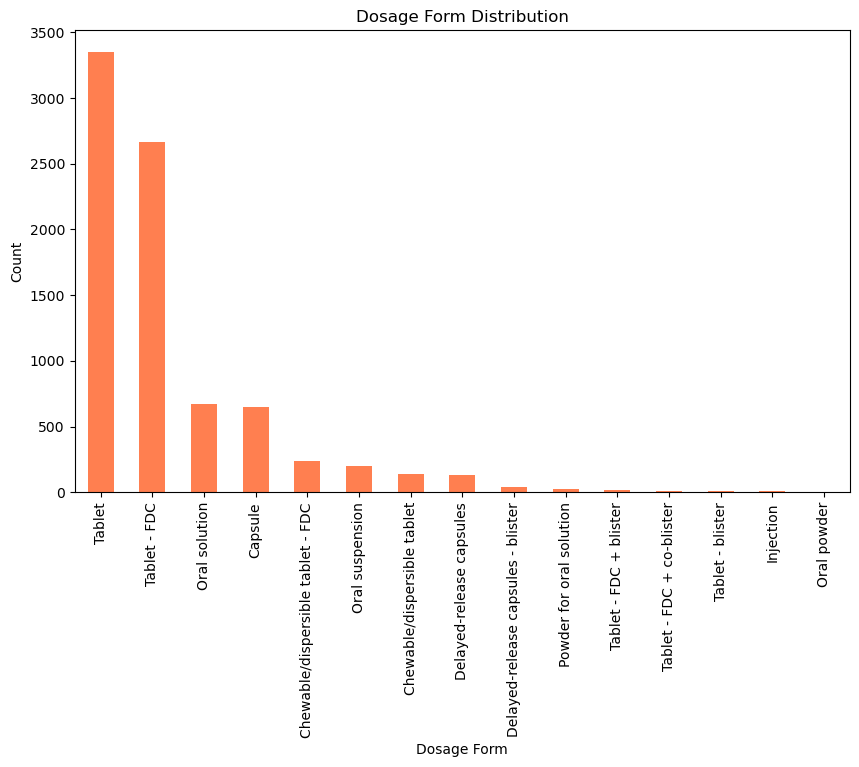

In [30]:
# Chart - 9 visualization code
df['Dosage Form'].value_counts().plot(kind='bar', color='coral', figsize=(10, 6))
plt.title('Dosage Form Distribution')
plt.ylabel('Count')
plt.xlabel('Dosage Form')
plt.show()
     

1. Why did you pick the specific chart?
Answer: Bar charts are simple and effective for displaying categorical data and comparing the frequency of different dosage forms.

2. What is/are the insight(s) found from the chart?
Answer: Tablets and Tablet-FDC are the most common dosage forms, suggesting high demand for these forms. Oral solutions and capsules also have significant counts, while other forms like injections and powders are less frequent.

3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
Answer: Yes, focusing production and distribution on popular forms like tablets and Tablet-FDC can optimize supply chain efficiency and meet market demand. Low-frequency forms may represent niche markets that require targeted strategies.

Chart - 10

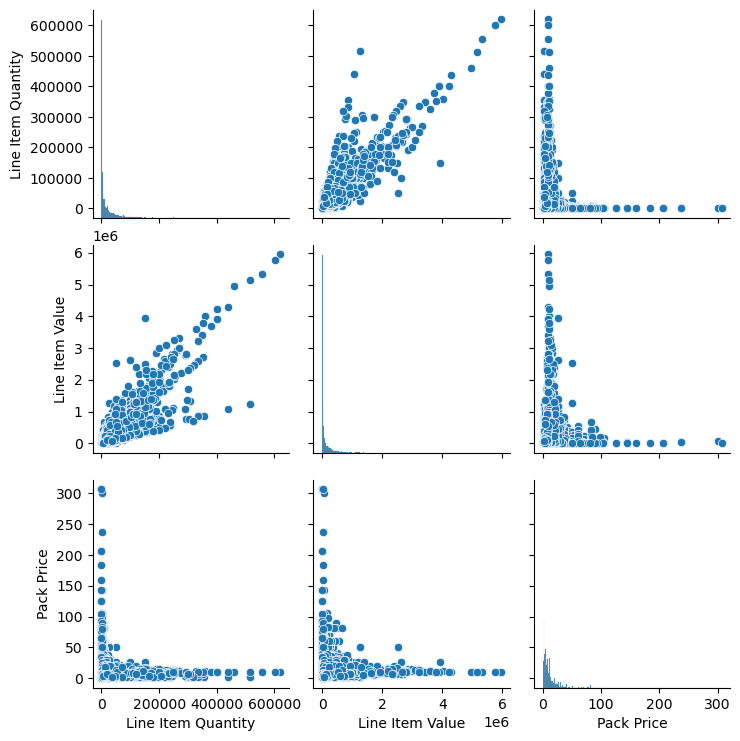

In [31]:
# Chart - 10 visualization code
sns.pairplot(df[['Line Item Quantity', 'Line Item Value', 'Pack Price', 'Weight (Kilograms)']])
plt.show()

1. Why did you pick the specific chart?
Answer: Pair plots are useful for exploring pairwise relationships between multiple variables, making it easier to spot patterns, correlations, and outliers.

2. What is/are the insight(s) found from the chart?
Answer: There is a positive correlation between Line Item Quantity and Line Item Value. However, Pack Price shows an inverse relationship with both Line Item Quantity and Line Item Value, indicating that higher quantities and values are associated with lower pack prices.

3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
Answer: Yes, understanding these correlations can help in pricing strategies and inventory management. For example, reducing pack prices for bulk orders might drive higher sales volumes, but the business should monitor profit margins to avoid negative financial impact.

Chart - 11 - Correlation Heatmap

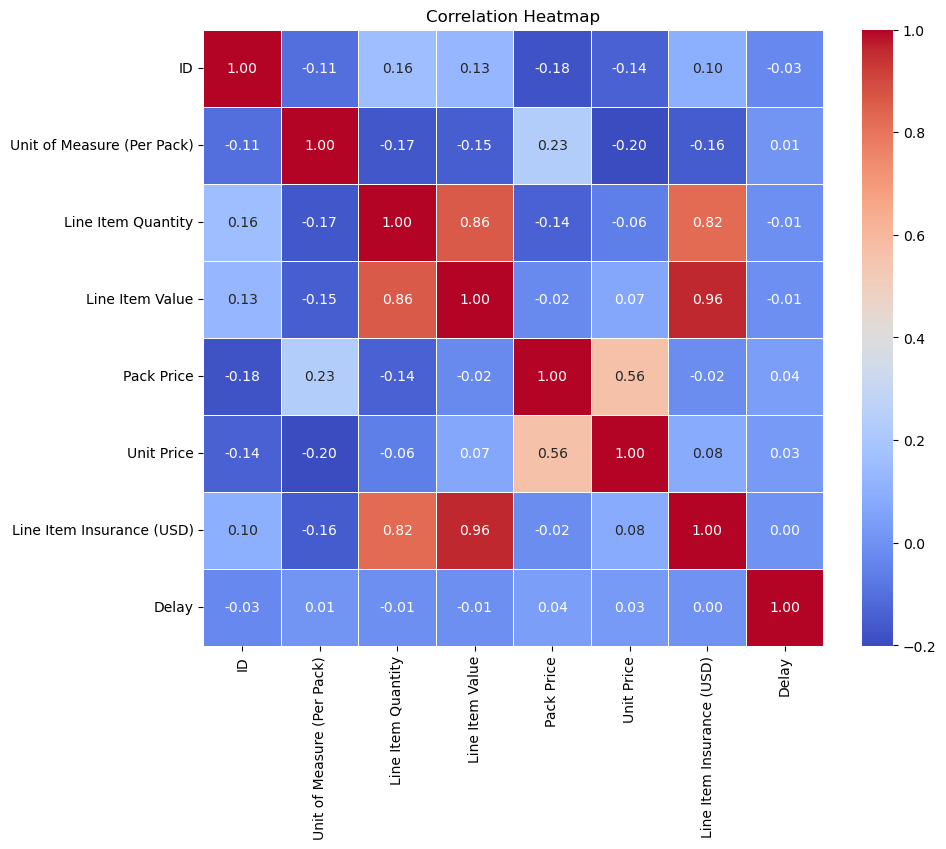

In [32]:
# Correlation Heatmap visualization code

numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

1. Why did you pick the specific chart?
Answer: Heatmaps are visually intuitive for correlation analysis between numerical variables, helping to quickly identify patterns and relationships.

2. What is/are the insight(s) found from the chart?
Answer: Strong positive correlation between Line Item Value and Line Item Quantity (0.86) and between Line Item Insurance (USD) and Line Item Value (0.96), indicating that higher quantities drive higher values and insurance costs. Pack Price has a moderate correlation with Unit Price (0.56), suggesting that changes in unit prices influence pack prices.

Chart - 12 - Pair Plot

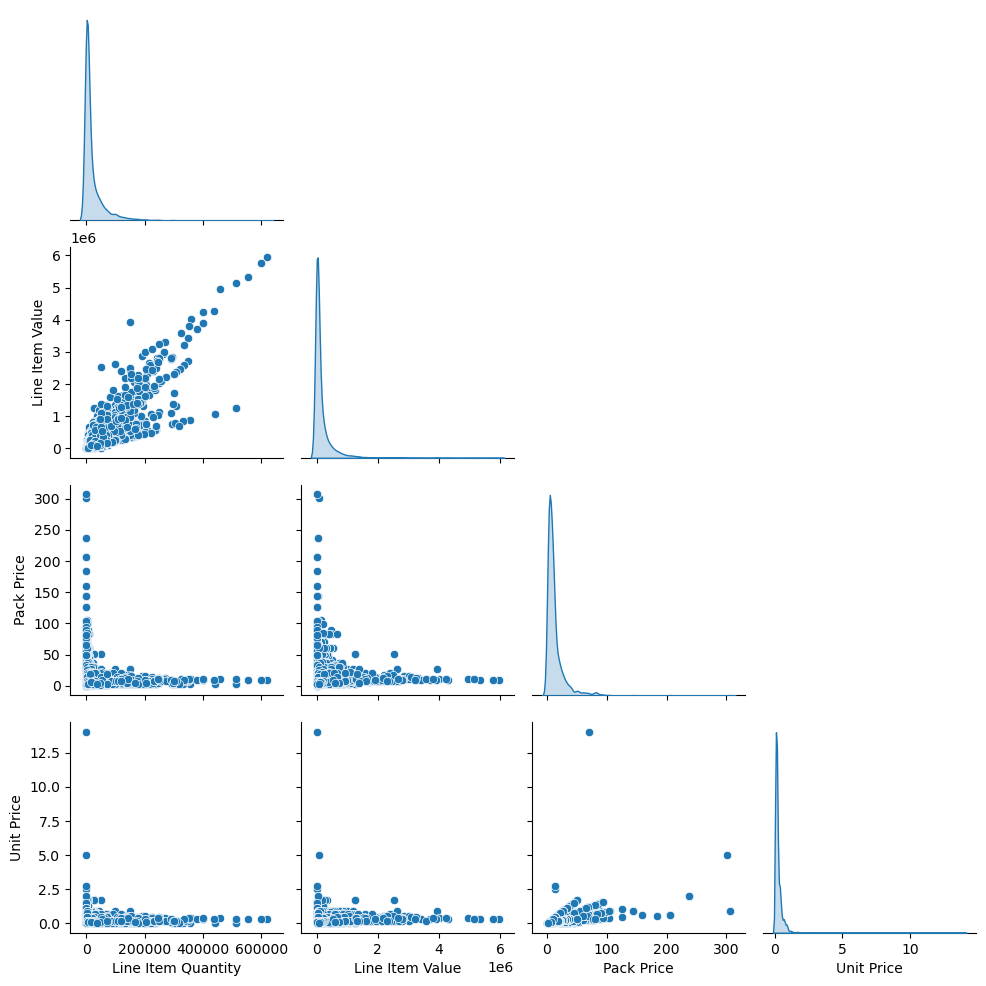

In [33]:
# Pair Plot visualization code

columns_to_plot = [
    'Line Item Quantity', 'Line Item Value', 'Pack Price',
    'Unit Price', 'Weight (Kilograms)', 'Freight Cost (USD)'
]
sns.pairplot(df[columns_to_plot], diag_kind='kde', corner=True)
plt.show()

1. Why did you pick the specific chart?
Answer Here: Pairplots show relationships and distributions across multiple numerical variables.

2. What is/are the insight(s) found from the chart?
Answer Here: Provides a holistic view of dependencies (e.g., the impact of Weight on Freight Cost).

Conclusion
The dataset reveals that Nigeria has the highest product demand, making it a key focus area for business operations. Vendor contributions show that SCMS from RDC accounts for the maximum value, emphasizing their critical role in the supply chain. Air shipment emerges as the most utilized mode across countries, likely due to its efficiency for time-sensitive deliveries. Delivery delays vary by country, indicating the need for targeted improvements in logistics to ensure timely fulfillment. The ARV product group has the highest line item value distribution, showcasing its significant contribution to overall revenue. Pairplot analysis of numerical values provides insights into relationships and trends within the dataset, aiding in better decision-making. These insights, combined with visualizations, highlight essential areas for optimization and growth opportunities.